In [2]:
# The purpose of this project is to analyze stock price information regarding
# Apple Inc. (AAPL)
# Date information was pulled: 27th of September, 2021
# Time range pulled: Previous 6 Months
# Source: https://www.nasdaq.com/market-activity/stocks/aapl/historical

In [3]:
# Importing libraries

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
# Importing dataset
# I downloaded it, locally, and will use my local drive to import

aapl_hist = pd.read_csv("apple_stock.csv")

In [5]:
# Previewing what the data looks like

aapl_hist.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$146.92,53477870,$145.66,$147.4701,$145.56
1,09/23/2021,$146.83,64838170,$146.65,$147.08,$145.64
2,09/22/2021,$145.85,76404340,$144.45,$146.43,$143.7001
3,09/21/2021,$143.43,75833960,$143.93,$144.6,$142.78
4,09/20/2021,$142.94,123478900,$143.8,$144.84,$141.27


In [6]:
# As we can see by the output, Close/Last is of type string

type(aapl_hist["Close/Last"].max())


str

In [7]:
# Let's convert it into a float so we can do calculations on it!

for i in range(0, len(aapl_hist["Close/Last"])):
    aapl_hist["Close/Last"][i] = float(aapl_hist["Close/Last"][i][1:])


<ipython-input-7-f96818d6c37f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_hist["Close/Last"][i] = float(aapl_hist["Close/Last"][i][1:])


In [8]:
# Fixed!

type(aapl_hist["Close/Last"].max())


float

In [9]:
# Similarly, we need to convert the Date column from string to datetime

for i in range(0, len(aapl_hist.Date)):
    aapl_hist.Date[i] = datetime.strptime(aapl_hist.Date[i], '%m/%d/%Y')

<ipython-input-9-e54020d1524a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_hist.Date[i] = datetime.strptime(aapl_hist.Date[i], '%m/%d/%Y')


In [10]:
# Fixed!

type(aapl_hist.Date[0])

datetime.datetime

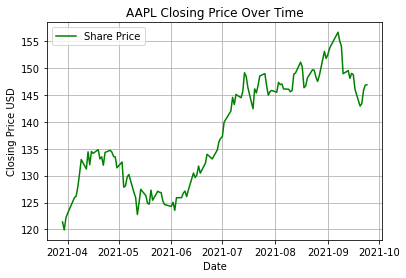

In [16]:
# Creating a basic, linear plot that tracks closing price over the past six months

plt.plot(aapl_hist.Date, aapl_hist["Close/Last"], color = "green") 
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price USD")
close_max = max(aapl_hist["Close/Last"])
close_min = min(aapl_hist["Close/Last"])
difference = close_max - close_min
increment = difference / 8
closing_price_ticks = [close_min]
temp = close_min
while temp < close_max:
    temp = temp + increment
    closing_price_ticks.append(round(temp,2))
plt.grid()
plt.legend(["Share Price"])
plt.show()

In [19]:
# Now that we have an idea of how the closing price has trended...
# Let us see how much the stock "swings" on a daily basis
# To do this, we will create another column called volatility by taking the difference of High and Low
# We will also need to convert High and Low to float

for i in range(0, len(aapl_hist.High)):
    aapl_hist.High[i] = float(aapl_hist.High[i][1:])
    
for i in range(0, len(aapl_hist.Low)):
    aapl_hist.Low[i] = float(aapl_hist.Low[i][1:])


TypeError: 'float' object is not subscriptable

In [20]:
# Creating Volatility column

volatility = []

for i in range(0, len(aapl_hist.High)):
    swing = aapl_hist.High[i] - aapl_hist.Low[i]
    volatility.append(round(swing, 2))
    
print(volatility)

[1.91, 1.44, 2.73, 1.82, 3.57, 3.06, 1.75, 3.07, 4.16, 2.67, 6.78, 2.16, 3.06, 2.87, 1.54, 2.32, 2.64, 1.51, 4.88, 1.92, 1.61, 2.52, 1.71, 2.3, 1.72, 3.5, 4.57, 2.59, 4.72, 1.17, 3.21, 1.19, 2.41, 1.18, 1.48, 1.67, 1.51, 2.86, 1.7, 2.22, 1.97, 4.43, 3.66, 2.13, 1.8, 2.38, 1.5, 4.14, 2.4, 3.88, 2.91, 1.89, 3.83, 2.32, 3.0, 3.4, 2.23, 3.08, 2.25, 1.57, 1.54, 2.14, 1.9, 1.08, 1.71, 1.09, 2.46, 3.2, 1.27, 2.9, 2.43, 1.21, 3.47, 1.34, 2.25, 1.23, 2.25, 1.49, 2.31, 1.72, 1.19, 1.41, 1.25, 2.56, 0.97, 2.0, 2.0, 2.79, 2.62, 2.06, 2.21, 1.76, 2.04, 1.89, 2.39, 3.5, 2.73, 1.78, 2.62, 2.48, 4.79, 2.24, 2.5, 4.62, 1.94, 1.3, 1.5, 2.96, 2.74, 2.45, 3.72, 2.13, 1.39, 1.36, 3.34, 2.73, 2.22, 3.57, 1.87, 2.78, 1.48, 3.09, 1.69, 2.37, 1.54, 1.85]


In [25]:
# Appending it to our main dataframe

aapl_hist["Volatility"] = volatility

aapl_hist.head()

,Date,Close/Last,Volume,Open,High,Low,Volatility
0,2021-09-24 00:00:00,146.92,53477870,$145.66,147.4701,145.56,1.91
1,2021-09-23 00:00:00,146.83,64838170,$146.65,147.08,145.64,1.44
2,2021-09-22 00:00:00,145.85,76404340,$144.45,146.43,143.7001,2.73
3,2021-09-21 00:00:00,143.43,75833960,$143.93,144.6,142.78,1.82
4,2021-09-20 00:00:00,142.94,123478900,$143.8,144.84,141.27,3.57


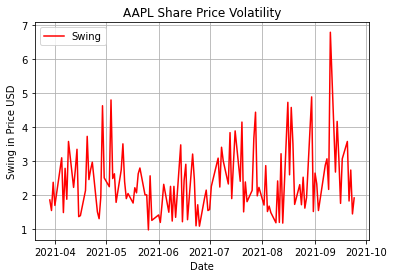

In [26]:
# Now, let's graph our volatility!

plt.plot(aapl_hist.Date, aapl_hist.Volatility, color = "red") 
plt.title("AAPL Share Price Volatility")
plt.xlabel("Date")
plt.ylabel("Swing in Price USD")
swing_max = max(aapl_hist.Volatility)
swing_min = min(aapl_hist.Volatility)
swing_difference = swing_max - swing_min
swing_increment = swing_difference / 8
swing_price_ticks = [swing_min]
swing_temp = swing_min
while swing_temp < swing_max:
    swing_temp = swing_temp + swing_increment
    swing_price_ticks.append(round(swing_temp,2))
plt.grid()
plt.legend(["Swing"])
plt.show()

In [27]:
# Now that we have seen trends and share price, let us compare
# How Apple's closing stock price has competed with Microsoft (MSFT) and Amazon (AMZN)!
# Microsoft data source

msft_hist = pd.read_csv("microsoft_stock.csv")
amzn_hist = pd.read_csv("amazon_stock.csv")

# Need to convert data for MSFT and AMZN like we did for AAPL

for i in range(0, len(msft_hist["Close/Last"])):
    msft_hist["Close/Last"][i] = float(msft_hist["Close/Last"][i][1:])
    
for i in range(0, len(amzn_hist["Close/Last"])):
    amzn_hist["Close/Last"][i] = float(amzn_hist["Close/Last"][i][1:])
    
for i in range(0, len(msft_hist.Date)):
    msft_hist.Date[i] = datetime.strptime(msft_hist.Date[i], '%m/%d/%Y')
    
for i in range(0, len(amzn_hist.Date)):
    amzn_hist.Date[i] = datetime.strptime(amzn_hist.Date[i], '%m/%d/%Y')
    


<ipython-input-27-65e62f18fe46>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_hist["Close/Last"][i] = float(msft_hist["Close/Last"][i][1:])
<ipython-input-27-65e62f18fe46>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_hist["Close/Last"][i] = float(amzn_hist["Close/Last"][i][1:])
<ipython-input-27-65e62f18fe46>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_hist.Date[i] = datetime.strptime(msft_hist.Date[i], '%

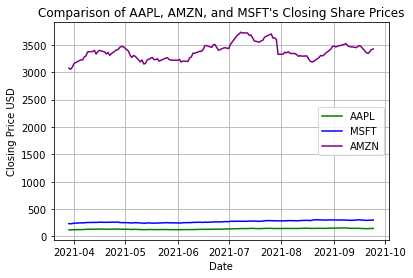

In [34]:
# Graphing!

plt.plot(aapl_hist.Date, aapl_hist["Close/Last"], color = "green") 
plt.plot(msft_hist.Date, msft_hist["Close/Last"], color = "blue")
plt.plot(amzn_hist.Date, amzn_hist["Close/Last"], color = "purple")
plt.title("Comparison of AAPL, AMZN, and MSFT's Closing Share Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price USD")
close_max = max([max(aapl_hist["Close/Last"]), max(amzn_hist["Close/Last"]), max(msft_hist["Close/Last"])])
close_min = min([min(aapl_hist["Close/Last"]), min(amzn_hist["Close/Last"]), min(msft_hist["Close/Last"])])
difference = close_max - close_min
increment = difference / 8
closing_price_ticks = [close_min]
temp = close_min
while temp < close_max:
    temp = temp + increment
    closing_price_ticks.append(round(temp,2))
plt.grid()
plt.legend(["AAPL", "MSFT", "AMZN"])
plt.show()

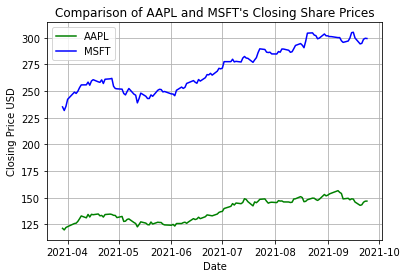

In [35]:
# Here is a comparison without Amazon's stock since it is much larger...

plt.plot(aapl_hist.Date, aapl_hist["Close/Last"], color = "green") 
plt.plot(msft_hist.Date, msft_hist["Close/Last"], color = "blue")
plt.title("Comparison of AAPL and MSFT's Closing Share Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price USD")
close_max = max([max(aapl_hist["Close/Last"]), max(msft_hist["Close/Last"])])
close_min = min([min(aapl_hist["Close/Last"]), min(msft_hist["Close/Last"])])
difference = close_max - close_min
increment = difference / 8
closing_price_ticks = [close_min]
temp = close_min
while temp < close_max:
    temp = temp + increment
    closing_price_ticks.append(round(temp,2))
plt.grid()
plt.legend(["AAPL", "MSFT"])
plt.show()